In [1]:
%pip install pandas
%pip install plotly
%pip install opencv-python
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import cv2
import os
import numpy as np
import plotly.express as px

In [3]:
ai_generated_df_1 = pd.read_csv("../../data/raw/ai_generated/Emotion_Recognition12024-06-20_04_00_26.csv", index_col=False)
ai_generated_df_1.drop(columns="Submission Date", inplace=True)
ai_generated_df_1.drop(columns="Name", inplace=True)
new_column_name =['Bild_' + str(i) for i in range(1, len(ai_generated_df_1.columns) + 1)]
ai_generated_df_1.columns = new_column_name
ai_generated_df_1.rename(columns={"emotion" : "expression_label"}, inplace=True)


ai_generated_df_1.head()

,Bild_1,Bild_2,Bild_3,Bild_4,Bild_5,Bild_6,Bild_7,Bild_8,Bild_9,Bild_10,...,Bild_24,Bild_25,Bild_26,Bild_27,Bild_28,Bild_29,Bild_30,Bild_31,Bild_32,Bild_33
0,Happy\nDisgust,Angry,Surprise\nDisgust,Sad,Angry,Fear,Neutral,Happy,Fear,Disgust,...,Surprise,Sad,Disgust,Surprise,Disgust,Sad,Surprise,Fear,Angry\nDisgust,Fear
1,Happy,Angry,Disgust,Neutral,Angry,Fear,Neutral,Happy,Surprise,Fear,...,Surprise,Fear,Angry,Surprise,Angry,Sad,Surprise,Fear,Angry,Fear
2,Happy,Angry,Disgust,Neutral,Angry,Angry,Neutral,Happy,Surprise,Sad,...,Surprise,Sad,Angry,Surprise,Angry\nDisgust,Sad,Surprise,Fear,Angry,Fear
3,Happy,Angry,Disgust,Neutral,Angry,Fear,Neutral,Neutral,Surprise,Sad,...,Surprise,Fear,Angry,Surprise,Disgust,Sad,Surprise,Fear,Surprise,Surprise
4,Happy,Angry,Disgust,Neutral,Angry,Fear,Neutral,Happy,Surprise,Disgust,...,Surprise,Neutral,Angry,Surprise,Disgust,Sad,Surprise,Angry,Disgust,Fear


In [4]:
ai_generated_df_2 = pd.read_csv("../../data/raw/ai_generated/Emotion_Recognition22024-06-20_04_01_00.csv", index_col=False)
ai_generated_df_2.drop(columns="Submission Date", inplace=True)
ai_generated_df_2.drop(columns="Name", inplace=True)
new_column_name =['Bild_' + str(i) for i in range(34, len(ai_generated_df_2.columns) + 34)]
ai_generated_df_2.columns = new_column_name
ai_generated_df_2.rename(columns={"emotion" : "expression_label"}, inplace=True)


ai_generated_df_2.head()

,Bild_34,Bild_35,Bild_36,Bild_37,Bild_38,Bild_39,Bild_40,Bild_41,Bild_42,Bild_43,...,Bild_57,Bild_58,Bild_59,Bild_60,Bild_61,Bild_62,Bild_63,Bild_64,Bild_65,Bild_66
0,Neutral,Disgust,Sad,Disgust,Neutral,Fear,Happy,Angry,Happy,Disgust,...,Surprise,Fear,Sad,Fear,Surprise,Fear,Neutral,Happy,Happy,Neutral
1,Neutral,Angry,Sad,Disgust,Neutral,Sad,Happy,Angry,Happy,Disgust,...,Surprise,Fear,Sad,Fear,Surprise,Fear,Happy,Happy,Happy,Happy
2,Neutral,Angry,Sad,Disgust,Neutral,Fear,Happy,Angry,Happy,Disgust,...,Surprise,Sad,Sad,Sad,Surprise\nDisgust,Sad,Neutral,Happy,Happy,Happy
3,Neutral,Disgust,Sad,Disgust,Neutral,Fear,Happy,Fear,Happy,Disgust,...,Surprise,Fear,Fear,Fear,Surprise,Sad,Happy,Neutral,Happy,Neutral
4,Neutral,Angry,Sad,Disgust,Neutral,Fear,Happy,Angry,Happy,Disgust,...,Surprise,Fear,Sad,Fear,Surprise,Fear,Neutral,Happy,Happy,Happy


In [5]:

combined_df = pd.concat([ai_generated_df_1, ai_generated_df_2], axis=1)

combined_df

,Bild_1,Bild_2,Bild_3,Bild_4,Bild_5,Bild_6,Bild_7,Bild_8,Bild_9,Bild_10,...,Bild_57,Bild_58,Bild_59,Bild_60,Bild_61,Bild_62,Bild_63,Bild_64,Bild_65,Bild_66
0,Happy\nDisgust,Angry,Surprise\nDisgust,Sad,Angry,Fear,Neutral,Happy,Fear,Disgust,...,Surprise,Fear,Sad,Fear,Surprise,Fear,Neutral,Happy,Happy,Neutral
1,Happy,Angry,Disgust,Neutral,Angry,Fear,Neutral,Happy,Surprise,Fear,...,Surprise,Fear,Sad,Fear,Surprise,Fear,Happy,Happy,Happy,Happy
2,Happy,Angry,Disgust,Neutral,Angry,Angry,Neutral,Happy,Surprise,Sad,...,Surprise,Sad,Sad,Sad,Surprise\nDisgust,Sad,Neutral,Happy,Happy,Happy
3,Happy,Angry,Disgust,Neutral,Angry,Fear,Neutral,Neutral,Surprise,Sad,...,Surprise,Fear,Fear,Fear,Surprise,Sad,Happy,Neutral,Happy,Neutral
4,Happy,Angry,Disgust,Neutral,Angry,Fear,Neutral,Happy,Surprise,Disgust,...,Surprise,Fear,Sad,Fear,Surprise,Fear,Neutral,Happy,Happy,Happy
5,Happy,Angry,Disgust,Neutral,Angry,Disgust,Neutral,Happy,Surprise,Disgust,...,Surprise,Fear,Sad,Fear,Surprise,Fear,Happy,Happy,Happy,Neutral
6,Happy,Angry,Disgust,Neutral,Angry,Fear,Neutral,Happy,Surprise,Sad,...,Fear,Fear,Sad,Fear,Surprise,Fear,Neutral,Happy,Happy,Happy
7,Happy,Angry,Disgust,Neutral,Angry,Fear,Neutral,Happy,Surprise,Sad,...,Surprise,Fear,Sad,Fear,Surprise,Fear,Neutral,Neutral,Happy,Neutral
8,Neutral,Angry,Disgust,Neutral,Angry,Fear,Neutral,Happy,Surprise,Fear,...,Fear,Fear,Sad,Fear,Surprise,Fear,Neutral,Happy,Happy,Neutral
9,Happy,Angry,Disgust,Sad,Angry,Fear,Neutral,Happy,Surprise,Disgust,...,Surprise\nFear,Fear\nSad,Sad,Fear,Surprise\nFear,Sad,Neutral,Happy,Happy,Neutral


In [6]:
most_labeled_label = [combined_df[col].mode()[0] for col in combined_df.columns]

most_labeled_label

['Happy',
 'Angry',
 'Disgust',
 'Neutral',
 'Angry',
 'Fear',
 'Neutral',
 'Happy',
 'Surprise',
 'Disgust',
 'Disgust',
 'Disgust',
 'Sad',
 'Angry',
 'Surprise',
 'Neutral',
 'Sad',
 'Sad',
 'Surprise',
 'Sad',
 'Fear',
 'Surprise',
 'Sad',
 'Surprise',
 'Fear',
 'Angry',
 'Surprise',
 'Disgust',
 'Sad',
 'Surprise',
 'Fear',
 'Angry',
 'Fear',
 'Neutral',
 'Angry',
 'Sad',
 'Disgust',
 'Neutral',
 'Fear',
 'Happy',
 'Angry',
 'Happy',
 'Disgust',
 'Angry',
 'Neutral',
 'Angry',
 'Neutral',
 'Surprise',
 'Sad',
 'Angry',
 'Angry',
 'Sad',
 'Angry',
 'Surprise',
 'Fear',
 'Happy',
 'Surprise',
 'Fear',
 'Sad',
 'Fear',
 'Surprise',
 'Fear',
 'Neutral',
 'Happy',
 'Happy',
 'Neutral']

In [7]:
combined_average_df = pd.DataFrame({
    'image_name': combined_df.columns,
    'expression_label': most_labeled_label
})

combined_average_df

,image_name,expression_label
0,Bild_1,Happy
1,Bild_2,Angry
2,Bild_3,Disgust
3,Bild_4,Neutral
4,Bild_5,Angry
...,...,...
61,Bild_62,Fear
62,Bild_63,Neutral
63,Bild_64,Happy
64,Bild_65,Happy


In [8]:
combined_average_df['image_name'] = combined_average_df['image_name'].astype(str) + '.jpg'

combined_average_df.index += 1

combined_average_df.head()

,image_name,expression_label
1,Bild_1.jpg,Happy
2,Bild_2.jpg,Angry
3,Bild_3.jpg,Disgust
4,Bild_4.jpg,Neutral
5,Bild_5.jpg,Angry


In [9]:
combined_average_df['expression_label'] = combined_average_df['expression_label'].str.lower()

combined_average_df.head()

,image_name,expression_label
1,Bild_1.jpg,happy
2,Bild_2.jpg,angry
3,Bild_3.jpg,disgust
4,Bild_4.jpg,neutral
5,Bild_5.jpg,angry


In [10]:
img_folder_path = "../../data/raw/ai_generated/img/"

In [19]:

face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


images = []
image_names = []
image_expressions = []


for index, row in combined_average_df.iterrows():
    img = cv2.imread(img_folder_path + row["image_name"])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)
    
    for (x, y, w, h) in faces:
       
        margin_percent = 0.2
        margin_x = int(w * margin_percent)
        margin_y = int(h * margin_percent)
        
       
        x -= margin_x
        y -= margin_y
        w += 2 * margin_x
        h += 2 * margin_y
        
        
        x = max(0, x)
        y = max(0, y)
        w = min(w, img.shape[1] - x)
        h = min(h, img.shape[0] - y)
        
        
        face_image = img[y:y+h, x:x+w]
        image_gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        resized_img = cv2.resize(image_gray, (96, 96))
        
        if(row["expression_label"] == "surprise" and index == 27):
            continue

        if(row["expression_label"] == "angry" and index == 5):
            continue
        

        images.append(resized_img)
        image_names.append(row["expression_label"] + "_" + str(index) + ".jpg")
        image_expressions.append(row["expression_label"])

  

In [20]:
processed_folder_path = "../../data/processed/ai_generated/img/"

if not os.path.exists(processed_folder_path):
    os.makedirs(processed_folder_path)

for i, img in enumerate(images):
    cv2.imwrite(
        os.path.join(
            processed_folder_path, image_names[i]
        ),
        img,
    )

In [21]:
data = {
    "image_name": image_names,
    "expression_label": image_expressions,
    
}

# Create the DataFrame
new_label_df = pd.DataFrame(data)
new_label_df.head()

,image_name,expression_label
0,happy_1.jpg,happy
1,angry_2.jpg,angry
2,disgust_3.jpg,disgust
3,neutral_4.jpg,neutral
4,fear_6.jpg,fear


In [22]:
label_path = "../../data/processed/ai_generated/labels.csv"

new_label_df.to_csv(label_path, index=False)

In [23]:
len(images)

60

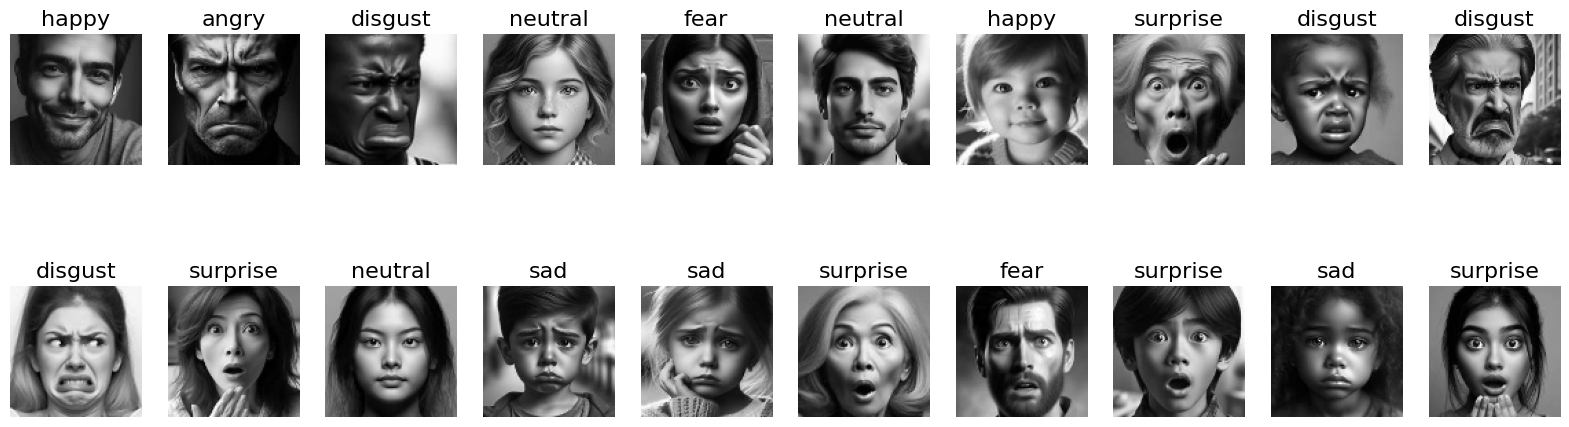

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 10, figsize=(20, 6))
for idx in range(len(images[:20])):
    img = images[idx]
    emotion = image_expressions[idx]
    row, col = divmod(idx, 10)
    ax[row, col].imshow(img, cmap="gray")
    ax[row, col].axis("off")
    ax[row, col].set_title(emotion, fontsize=16)   

plt.show()